
<h1>Imbalanced_Data_Set_Project</h1>
<h3>Abera A. Muhamed</h3>
<ol>
    <h5> Introduction</h5>
  

 An organization XYZ provides several ways for its customers to make payments. While their service counselors can take payments over the phone, it is more cost-efficient for customers to make payments through their self-service channels such as online or through the automated phone system.  The objective is to use a predictive model to select people to receive a pre-emptive e-mail message designed to encourage them to pay online.

 The task is to build a machine learning model that predicts customers who are likely to make a service payment call in the next 5 days.




<p>  If you have spent some time in machine learning and data science, you would have definitely come across imbalanced class distribution. This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. </p>
     
        
<p> This problem is predominant in scenarios where anomaly detection is crucial like electricity pilferage, fraudulent transactions in banks, identification of rare diseases, etc. In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.    </p>
     
        
<p>
This happens because Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes. Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, it is usually referred to as a rare event.</p>
     
        

   
 <h5> Dataset Description: </h5>
The csv file contains data on customers who have had a bill due in the next 5 days and whether they made a service payment call. 

<p> This notebook describes various approaches for solving such class imbalance problems using various sampling techniques. We also weigh each technique for its pros and cons. Finally, I reveal an approach using which you can create a balanced class distribution and apply ensemble learning technique designed especially for this purpose.</p>

</ol>

### Challenges with standard Machine learning techniques
The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

Evaluation of a classification algorithm performance is measured by the Confusion Matrix which contains information about the actual and the predicted class. However, while working in an imbalanced domain accuracy is not an appropriate measure to evaluate model performance. For example,a classifier which achieves an accuracy of 96 % with an event rate of 4 % is not accurate, if it classifies all instances as the majority class. And eliminates the 4 % minority class observations as noise.

### Examples of imbalanced data
Apart from fraudulent transactions, other examples of a common business problem with imbalanced dataset are:

- Datasets to identify customer churn where a vast majority of customers will continue using the service. Specifically, Telecommunication companies where Churn Rate is lower than 2 %.
- Data sets to identify rare diseases in medical diagnostics etc.
- Natural Disaster like Earthquakes

In [ ]:
# import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from collections import Counter

from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, \
precision_score, recall_score, roc_auc_score, f1_score, precision_recall_curve, auc, log_loss 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style='darkgrid',palette='Set2')

### Loading Dataset

In [ ]:
data = pd.read_csv('xyz.csv')
data.head() #Displaying the first five events

In [3]:
# Displaying the column names of the dataframe
data.columns

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag'],
      dtype='object')

<p>Our data set has 29 input features. Fore example, two features that  are <strong>Tenure</strong>, which refers years of tenure with company, and <strong>Age</strong>, which tell us age of policyholder. The target variable is Call_Flag which receive <strong>1</strong> if there was a service payment   and <strong>0</strong> if there was not a service payment </p>

Data shape

In [4]:
# display the number of  rows and columns of the dataframe
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")
 #or
print("Data Shape:", data.shape, "\n")

There are 130086 rows and 29 columns.
Data Shape: (130086, 29) 



Data types

In [5]:
data.dtypes

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment           object
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130086 entries, 0 to 130085
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DATE_FOR               130086 non-null  object 
 1   RTD_ST_CD              130086 non-null  object 
 2   CustomerSegment        130086 non-null  object 
 3   Tenure                 130086 non-null  float64
 4   Age                    130086 non-null  float64
 5   MART_STATUS            130086 non-null  object 
 6   GENDER                 130086 non-null  object 
 7   CHANNEL1_6M            129277 non-null  float64
 8   CHANNEL2_6M            129277 non-null  float64
 9   CHANNEL3_6M            129277 non-null  float64
 10  CHANNEL4_6M            129277 non-null  float64
 11  CHANNEL5_6M            129277 non-null  float64
 12  METHOD1_6M             129277 non-null  float64
 13  RECENT_PAYMENT         129277 non-null  float64
 14  PAYMENTS_6M            129277 non-nu

<p> We can observe a date variable, categorical variable, and numeric variables with different scales.</p>

##### Unique values in the data

In [7]:
#See the unique values in the data
for columnname in data:
    print(data[columnname].unique().shape[0], "unique values of", columnname, data[columnname].unique(), "\n")

8 unique values of DATE_FOR ['5/19/2014' '5/17/2014' '5/15/2014' '5/16/2014' '5/20/2014' '5/14/2014'
 '5/13/2014' '5/18/2014'] 

51 unique values of RTD_ST_CD ['ST_S0' 'ST_S1' 'ST_S2' 'ST_S3' 'ST_S4' 'ST_S5' 'ST_S6' 'ST_S7' 'ST_S8'
 'ST_S9' 'ST_S10' 'ST_S11' 'ST_S12' 'ST_S13' 'ST_S14' 'ST_S15' 'ST_S16'
 'ST_S17' 'ST_S18' 'ST_S19' 'ST_S20' 'ST_S21' 'ST_S22' 'ST_S23' 'ST_S24'
 'ST_S25' 'ST_S26' 'ST_S27' 'ST_S28' 'ST_S29' 'ST_S30' 'ST_S31' 'ST_S32'
 'ST_S33' 'ST_S34' 'ST_S35' 'ST_S36' 'ST_S37' 'ST_S38' 'ST_S39' 'ST_S40'
 'ST_S41' 'ST_S42' 'ST_S43' 'ST_S44' 'ST_S45' 'ST_S46' 'ST_S47' 'ST_S48'
 'ST_S49' 'ST_S50'] 

4 unique values of CustomerSegment ['1' '3' '2' 'NONE'] 

10228 unique values of Tenure [16.175222 15.931554 15.937029 ...  0.049281  0.054757  0.046543] 

22347 unique values of Age [78.403833 70.989733 87.578371 ... 91.895962 22.099932 21.489391] 

5 unique values of MART_STATUS ['MS_S0' 'MS_S1' 'MS_S2' 'MS_S3' 'MS_S4'] 

2 unique values of GENDER ['F' 'M'] 

14 unique values o

<p> This shows there is only one value of 'EVENT1_30_FLAG' which is 0.  Because, we can see that 100% of the counts belongs to the value "0". This is called "redundant, constant-value feature", which have no predictive power. So, we can remove this column. The "DATE_FOR" is not relevant for our purpose, so we will drop it too.</p>

In [8]:
# Drop the unnecessary features 'DATE_FOR' and 'EVENT1_30_FLAG'
data = data.drop(['DATE_FOR', 'EVENT1_30_FLAG'], axis=1)

#### Missing data

In [9]:
data.isnull().sum() #number of missing values

RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
dtype: int64

<p>There are 809 null values in our data set. So, we do  need the step to replace null values or remove. </p>

## Exploratory Data Analysis (EDA)

#### Summary Statistics

In [10]:

data.describe()

,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,130086.000000,130086.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,...,130086.000000,130086.000000,130086.000000,130086.00000,130086.000000,130086.000000,130086.000000,130086.000000,130086.000000,130086.000000
mean,8.583048,48.842201,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,...,0.196655,0.283559,0.908806,2.41205,0.055671,0.080009,0.193349,0.948326,0.130675,0.036622
std,7.297112,14.038089,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,...,0.606591,0.847804,1.386168,1.22286,0.229286,0.271308,0.509199,2.143749,0.337046,0.187832
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.249829,37.878166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.147159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.610540,58.858316,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,0.000000,2.000000,3.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,10.000000,16.000000,36.000000,36.00000,1.000000,1.000000,4.000000,45.000000,1.000000,1.000000


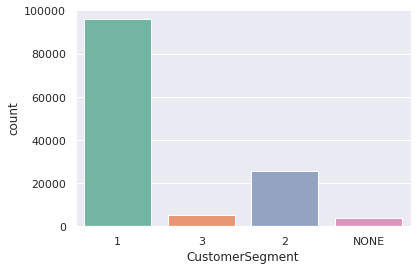

In [11]:
# Visualizing the 'CustomerSegment' variable
ax = sns.countplot(x="CustomerSegment", data=data)
#data['CustomerSegment']

It is noted that the 'CustomerSegment' variable doesn't show any missing value. We regard the "None" value as missing value. In fact, we can observe the missing value by transforming this variable to numeric.

In [12]:
# Change data type to numeric so that we can detect the missing values.
data['CustomerSegment'] = data['CustomerSegment'].apply(pd.to_numeric, errors='coerce')
data['CustomerSegment'] = data['CustomerSegment'].astype('category')
data['CustomerSegment'].isnull().sum()

3702

In [13]:
df = data.dropna() #removing null values
df.isnull().sum() #Checking the missing values

RTD_ST_CD                0
CustomerSegment          0
Tenure                   0
Age                      0
MART_STATUS              0
GENDER                   0
CHANNEL1_6M              0
CHANNEL2_6M              0
CHANNEL3_6M              0
CHANNEL4_6M              0
CHANNEL5_6M              0
METHOD1_6M               0
RECENT_PAYMENT           0
PAYMENTS_6M              0
CHANNEL1_3M              0
CHANNEL2_3M              0
CHANNEL3_3M              0
CHANNEL4_3M              0
CHANNEL5_3M              0
METHOD1_3M               0
PAYMENTS_3M              0
NOT_DI_3M                0
NOT_DI_6M                0
EVENT2_90_SUM            0
LOGINS                   0
POLICYPURCHASECHANNEL    0
Call_Flag                0
dtype: int64

In [14]:
#See the shape of data after removing the missing values and droping unnecessary columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns of data.")

There are 125594 rows and 27 columns of data.


In [15]:
# Convert labels to numbers 
df['GENDER'] = LabelEncoder().fit_transform(df['GENDER'])
df['RTD_ST_CD'] = LabelEncoder().fit_transform(df['RTD_ST_CD'])
df['MART_STATUS'] = LabelEncoder().fit_transform(df['MART_STATUS'])
df['NOT_DI_3M'] = LabelEncoder().fit_transform(df['NOT_DI_3M'])
df['NOT_DI_6M'] = LabelEncoder().fit_transform(df['NOT_DI_6M'])
df['POLICYPURCHASECHANNEL'] = LabelEncoder().fit_transform(df['POLICYPURCHASECHANNEL'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125594 entries, 0 to 130085
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   RTD_ST_CD              125594 non-null  int64   
 1   CustomerSegment        125594 non-null  category
 2   Tenure                 125594 non-null  float64 
 3   Age                    125594 non-null  float64 
 4   MART_STATUS            125594 non-null  int64   
 5   GENDER                 125594 non-null  int64   
 6   CHANNEL1_6M            125594 non-null  float64 
 7   CHANNEL2_6M            125594 non-null  float64 
 8   CHANNEL3_6M            125594 non-null  float64 
 9   CHANNEL4_6M            125594 non-null  float64 
 10  CHANNEL5_6M            125594 non-null  float64 
 11  METHOD1_6M             125594 non-null  float64 
 12  RECENT_PAYMENT         125594 non-null  float64 
 13  PAYMENTS_6M            125594 non-null  float64 
 14  CHANNEL1_3M         

In [17]:
#Unique values of RTD_ST_CD
print(df['RTD_ST_CD'].unique())
print(len(df['RTD_ST_CD'].unique()))

[ 0  1 12 23 34 45 47 48 49 50  2  3  4  5  6  7  8  9 10 11 13 14 15 16
 17 18 19 20 21 22 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42
 43 44 46]
51


RTD_ST_CD variable has 51 unique values.  This feature may indicate States of the US.  

We use a sorted barplot to visualize the averaged Call_Flag against RTD_ST_CD.  Having 51 categorical dummies are creating way too many variables. Thus, we need to design our strategy to cut groups from "RTD_ST_CD". This can be done by taking the average "Call_Flag". And then we have three categorical dummies instead and the column "RTD_ST_CD" will be dropped.

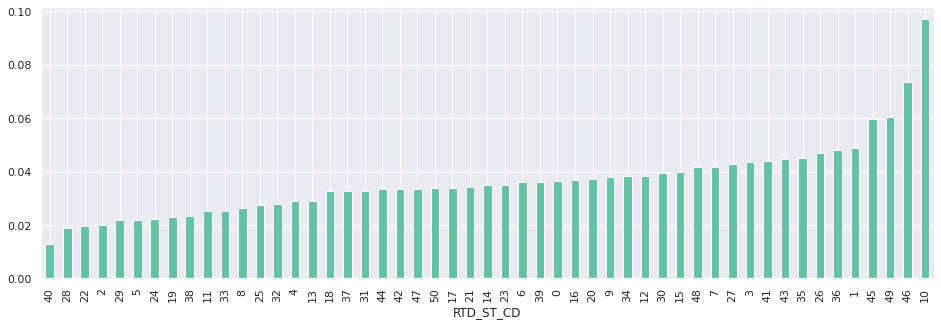

In [18]:
df.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values().plot(kind="bar", figsize=(16,5));

In [19]:
df = df.join(pd.cut(df.groupby(
            "RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, labels=[
            "0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")
df.drop(["RTD_ST_CD"], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125594 entries, 0 to 130085
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CustomerSegment        125594 non-null  category
 1   Tenure                 125594 non-null  float64 
 2   Age                    125594 non-null  float64 
 3   MART_STATUS            125594 non-null  int64   
 4   GENDER                 125594 non-null  int64   
 5   CHANNEL1_6M            125594 non-null  float64 
 6   CHANNEL2_6M            125594 non-null  float64 
 7   CHANNEL3_6M            125594 non-null  float64 
 8   CHANNEL4_6M            125594 non-null  float64 
 9   CHANNEL5_6M            125594 non-null  float64 
 10  METHOD1_6M             125594 non-null  float64 
 11  RECENT_PAYMENT         125594 non-null  float64 
 12  PAYMENTS_6M            125594 non-null  float64 
 13  CHANNEL1_3M            125594 non-null  int64   
 14  CHANNEL2_3M         

##### Data Reduction:   Check correlation between variables with Channel_6Ms and Channel_3Ms.


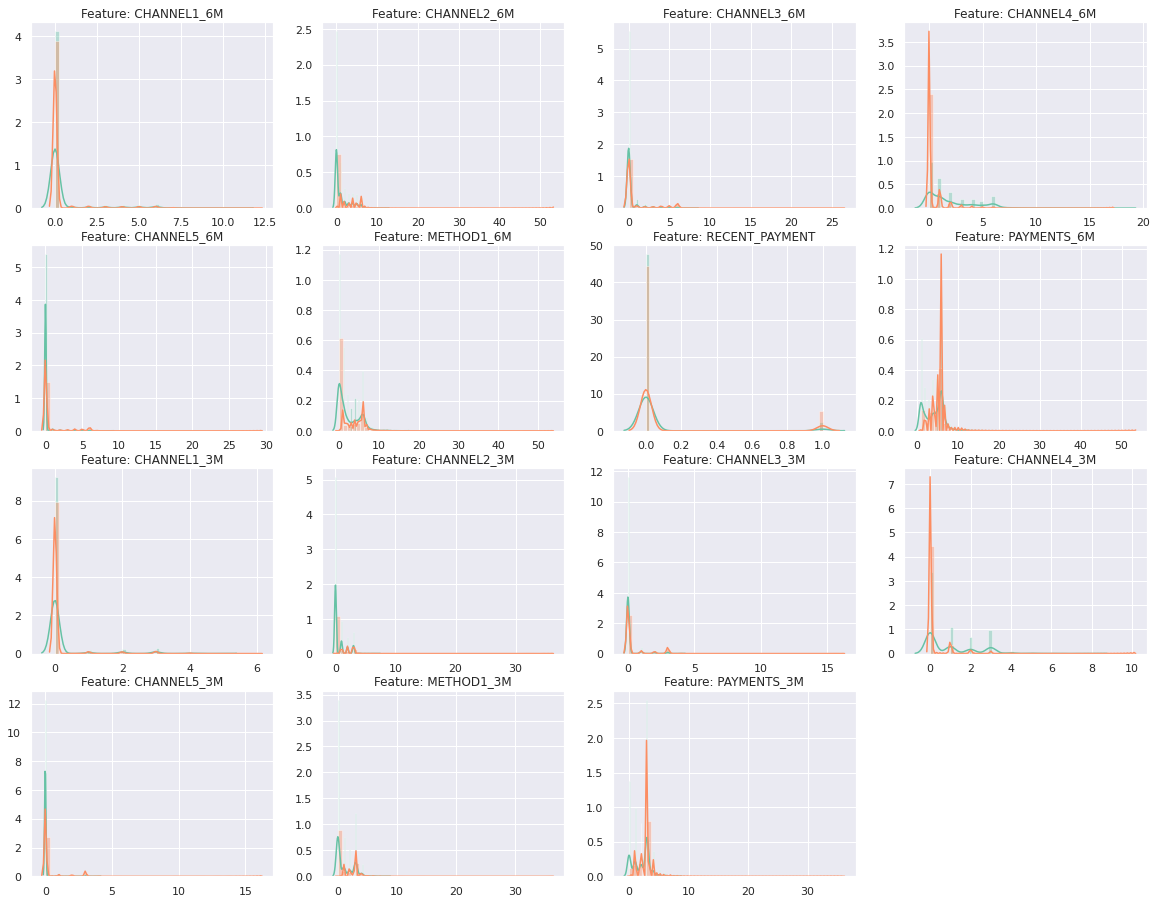

In [21]:
#Select only the numeric features.
v_features = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M']#, 'NOT_DI_3M',
       #'NOT_DI_6M', 'EVENT2_90_SUM', 'LOGINS',
       #'POLICYPURCHASECHANNEL', 'Call_Flag']


plt.figure(figsize=(20,7*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df['Call_Flag'] == 1], bins=50)
    sns.distplot(df[cn][df['Call_Flag'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
plt.show()


It shows that all CHANNEL_6Ms variables are highly correlated  to CHANNEL_3Ms variables. To avoid multicollinearity, all CHANNEL_6Ms variables will be dropped. For the same reason, METHOD1_6Ms, PAYMENTS_6Ms can also be dropped.

**OR:  Let us visualize in other ways**

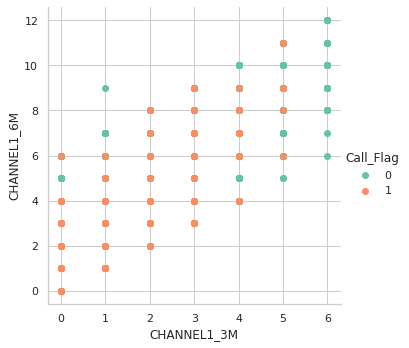

In [22]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'CHANNEL1_3M', 'CHANNEL1_6M').add_legend()

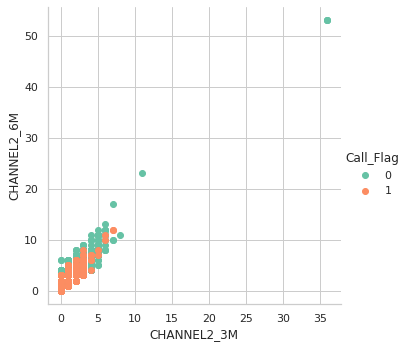

In [23]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'CHANNEL2_3M', 'CHANNEL2_6M').add_legend()

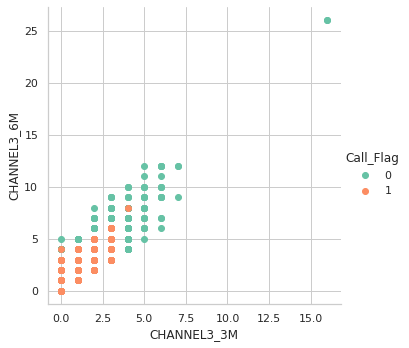

In [24]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'CHANNEL3_3M', 'CHANNEL3_6M').add_legend()

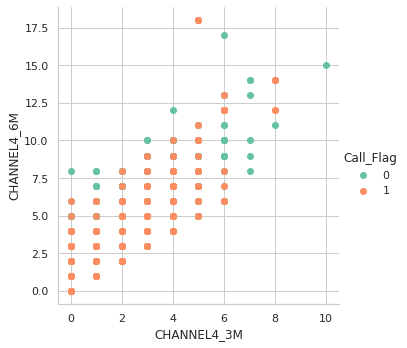

In [25]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'CHANNEL4_3M', 'CHANNEL4_6M').add_legend()

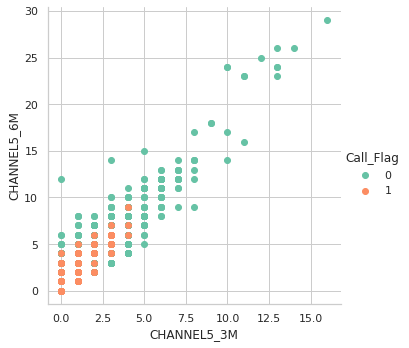

In [26]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'CHANNEL5_3M', 'CHANNEL5_6M').add_legend()

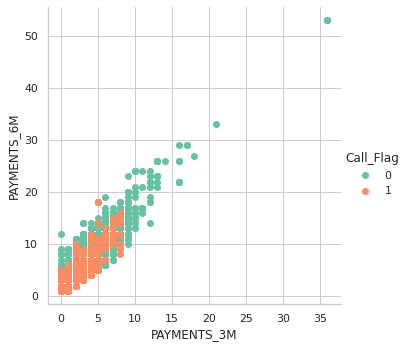

In [27]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'PAYMENTS_3M', 'PAYMENTS_6M').add_legend()

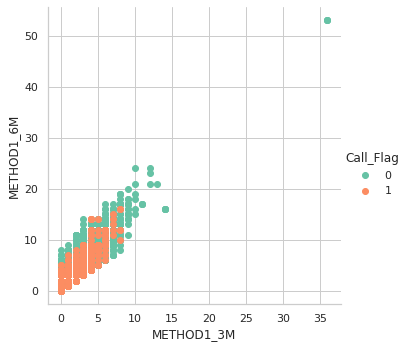

In [28]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'Call_Flag', size = 5).map(plt.scatter, 'METHOD1_3M', 'METHOD1_6M').add_legend()

We observed that there is a multicollinearity and to avoid it we wll drop the "CHANNEL_6M"s variables.

In [29]:
df.iloc[:,[2,3,4,5,6,10,11,12,13,14]].corr()

,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M
Age,1.000000,0.092446,0.000873,-0.163731,0.079162,-0.282054,-0.049889,-0.073188,-0.140722,0.067882
MART_STATUS,0.092446,1.000000,0.023300,-0.026285,0.008247,-0.023008,0.012244,0.019356,-0.022297,0.008157
GENDER,0.000873,0.023300,1.000000,-0.009330,-0.069097,0.002899,-0.025852,-0.057450,-0.009876,-0.063661
CHANNEL1_6M,-0.163731,-0.026285,-0.009330,1.000000,-0.086647,0.352024,0.035531,0.279189,0.905238,-0.073462
CHANNEL2_6M,0.079162,0.008247,-0.069097,-0.086647,1.000000,0.155897,0.059767,0.181469,-0.078940,0.949807
METHOD1_6M,-0.282054,-0.023008,0.002899,0.352024,0.155897,1.000000,0.106312,0.394325,0.292990,0.160440
RECENT_PAYMENT,-0.049889,0.012244,-0.025852,0.035531,0.059767,0.106312,1.000000,0.179232,0.035429,0.069001
PAYMENTS_6M,-0.073188,0.019356,-0.057450,0.279189,0.181469,0.394325,0.179232,1.000000,0.227947,0.188668
CHANNEL1_3M,-0.140722,-0.022297,-0.009876,0.905238,-0.078940,0.292990,0.035429,0.227947,1.000000,-0.069539
CHANNEL2_3M,0.067882,0.008157,-0.063661,-0.073462,0.949807,0.160440,0.069001,0.188668,-0.069539,1.000000


In [30]:
df.iloc[:,[7,9,15,16,17,18,19,20]].corr()

,CHANNEL3_6M,CHANNEL5_6M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M
CHANNEL3_6M,1.000000,-0.149369,0.965213,-0.107089,-0.141995,-0.267045,0.094294,-0.101534
CHANNEL5_6M,-0.149369,1.000000,-0.143899,-0.098175,0.966084,-0.207729,0.111205,-0.077717
CHANNEL3_3M,0.965213,-0.143899,1.000000,-0.110152,-0.138822,-0.260429,0.135716,-0.093586
CHANNEL4_3M,-0.107089,-0.098175,-0.110152,1.000000,-0.096414,0.226919,0.178062,0.073980
CHANNEL5_3M,-0.141995,0.966084,-0.138822,-0.096414,1.000000,-0.202463,0.150837,-0.072101
METHOD1_3M,-0.267045,-0.207729,-0.260429,0.226919,-0.202463,1.000000,0.428335,0.278702
PAYMENTS_3M,0.094294,0.111205,0.135716,0.178062,0.150837,0.428335,1.000000,0.196524
NOT_DI_3M,-0.101534,-0.077717,-0.093586,0.073980,-0.072101,0.278702,0.196524,1.000000


In [31]:
df.drop(['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M',
           'METHOD1_6M','PAYMENTS_6M'], axis=1, inplace=True)
#df[['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']] = data[
#    ['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']].astype('category')

In [32]:
pd.options.mode.chained_assignment = None 

# Let's apply Frequency Encoding for all the categorical features

frq_rt = df.groupby('Call_Flag_ST').size()/len(df)
df.loc[:, 'Rated_Encoded']=df['Call_Flag_ST'].map(frq_rt)


frq_cs = df.groupby('CustomerSegment').size()/len(df)
df.loc[:, 'Cust_segm_Encoded']=df['CustomerSegment'].map(frq_cs)

# Let's remove the original eight categorical features

cat=['Call_Flag_ST','CustomerSegment']#, 'MART_STATUS', 'GENDER',  'RECENT_PAYMENT', 'NOT_DI_3M','NOT_DI_6M', 'POLICYPURCHASECHANNEL']
df=df.drop(cat, axis=1)

In [33]:
df['Rated_Encoded'] = LabelEncoder().fit_transform(df['Rated_Encoded'])
df['Cust_segm_Encoded'] = LabelEncoder().fit_transform(df['Cust_segm_Encoded'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125594 entries, 0 to 130085
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Tenure                 125594 non-null  float64
 1   Age                    125594 non-null  float64
 2   MART_STATUS            125594 non-null  int64  
 3   GENDER                 125594 non-null  int64  
 4   RECENT_PAYMENT         125594 non-null  float64
 5   CHANNEL1_3M            125594 non-null  int64  
 6   CHANNEL2_3M            125594 non-null  int64  
 7   CHANNEL3_3M            125594 non-null  int64  
 8   CHANNEL4_3M            125594 non-null  int64  
 9   CHANNEL5_3M            125594 non-null  int64  
 10  METHOD1_3M             125594 non-null  int64  
 11  PAYMENTS_3M            125594 non-null  int64  
 12  NOT_DI_3M              125594 non-null  int64  
 13  NOT_DI_6M              125594 non-null  int64  
 14  EVENT2_90_SUM          125594 non-nu

##### Understanding Target Variable
- The variable 'Call_Flag' is our target variable. It is an integer with values of "0" representing the policyholder didn't make a service payment call and "1" representing the policyholder made a service payment call.

In [34]:
print('Making a service call', round(df['Call_Flag'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Not Making a service call',round(df['Call_Flag'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Making a service call 96.32 % of the dataset
Not Making a service call 3.68 % of the dataset


In [35]:
import plotly.figure_factory as ff 
import plotly.offline as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs,init_notebook_mode, iplot, plot
from plotly import tools 
py.init_notebook_mode(connected = True)
import warnings
import cufflinks as cf
cf.go_offline()

#To see the making service call vs not making service call distribution
yes = df[(df['Call_Flag'] == 1)]
no = df[(df['Call_Flag'] != 0)]

trace = go.Pie(labels = ['No Service Payment Call', 'Service Payment Call'],
               values = df['Call_Flag'].value_counts(), 
               textfont=dict(size=10),
               opacity = 0.8,
               marker=dict(colors=['lightgreen','gold'],
                           line=dict(color='#000000',width=1.05)))


layout = dict(title =  'Distribution of Call_Flag variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

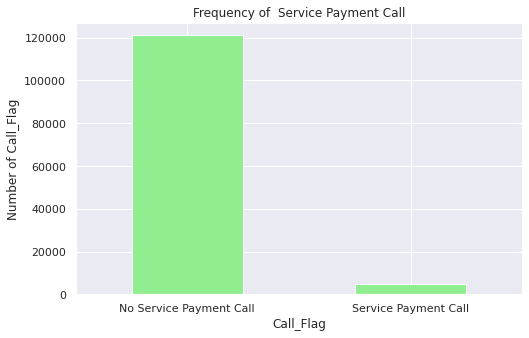

In [36]:
# Visualize the target variable
sns.set()
plt.figure(figsize=(8, 5))
df.groupby(['Call_Flag'])['Call_Flag'].count().plot.bar(color='lightgreen')
plt.title("Frequency of  Service Payment Call")
plt.ylabel("Number of Call_Flag")
plt.savefig('abe.jpg')
plt.xticks(np.arange(2), ['No Service Payment Call', 'Service Payment Call'], rotation=0);

<p>We noticed that there are many observations for no service payment call(0) as compared to service payment call (1). Hence, we are dealing with an imbalanced datasets. Most of machine learning algorithm not work well in the severe imbanced data set. </p>

###  Outlier detection

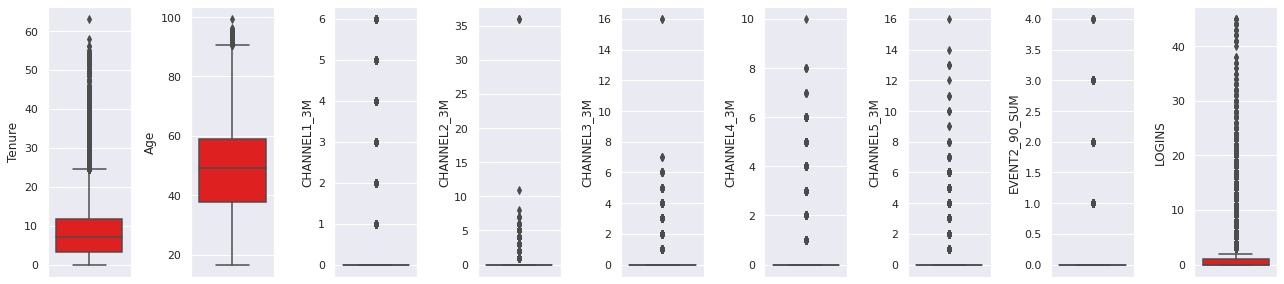

In [37]:
cat_ft = ['Tenure','Age', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'EVENT2_90_SUM', 'LOGINS']
df_features=df[cat_ft]
feature_list = df_features.columns.values
number_of_columns= len(feature_list)
number_of_rows = len(feature_list)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
for i in range(0,len(feature_list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set(style='darkgrid',palette='Set2')
    #sns.set_style('whitegrid')
    sns.boxplot(df_features[feature_list[i]],color='red',orient='v')
    plt.tight_layout()

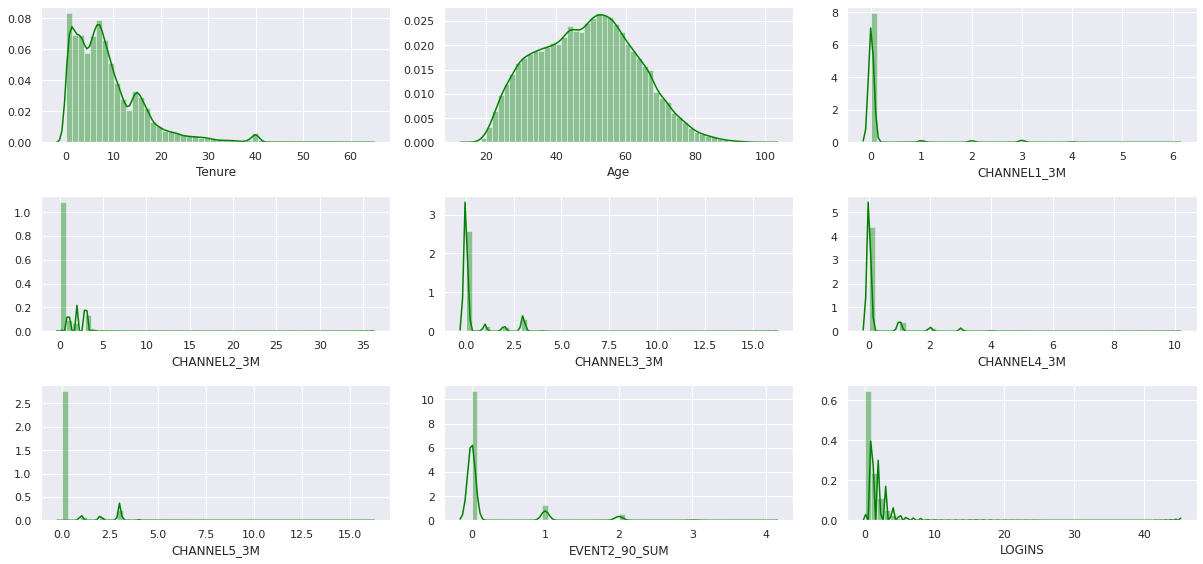

In [38]:
# Check whether the distribution of the features is normal or skewed
plt.figure(figsize=(17,8))
for i in range(0,len(feature_list)):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    sns.set(style='darkgrid',palette='Set2')
    sns.distplot(df_features[feature_list[i]],kde=True,color='green')

It can be seen from the boxplots that all features have outliers. From the the data distribution (density curve) above we can also observe that  "Age" feature is a  slightly normal distribution.

The <code>Tenure</code> feature is skewed. Log transformation is applied to this data variable. No matter whether applying log transformation or not, there are too many outliers in this data variable. Also outliers are on the left side of the distribution for the log transformed Tenure variable, which shouldn't be removed. Therefore  we will keep these ouliers.

<p>As we already saw that <code>Tenure</code> column has a extreme outliers so it necessary to remove them as they can effect the model's performance. We will use Interquartile range to detect outliers which removes anything below the lower limit (25 percentile) and anything above upper limit (75 Percentile). Here, as the data is skewed (kind of exponential) so having high cutoff may help us. We may also take the cutoff value as 5.0 instead of 1.5.</p>

<AxesSubplot:xlabel='Tenure'>

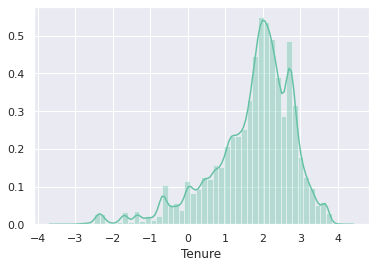

In [39]:
sns.distplot(np.log(df.Tenure))

<AxesSubplot:xlabel='Tenure'>

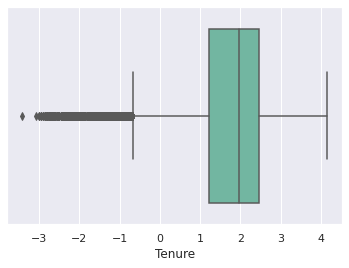

In [40]:
sns.boxplot(np.log(df.Tenure))

<AxesSubplot:xlabel='CHANNEL4_3M'>

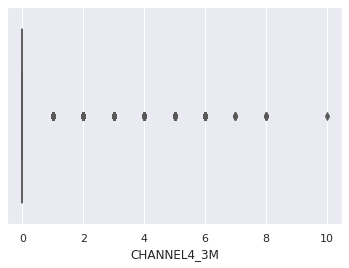

In [41]:
sns.boxplot(df['CHANNEL4_3M'])

<AxesSubplot:xlabel='LOGINS'>

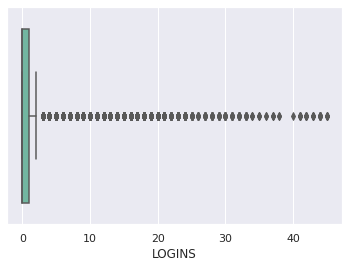

In [42]:
sns.boxplot(df['LOGINS'])

In [43]:
def detectOutliers(df, feature_, cutoff):
    Q3 = np.percentile(df[feature_], 75)
    Q1 = np.percentile(df[feature_], 25)
    IQR = (Q3 - Q1)
    lower_fence = Q1 - (IQR * cutoff)
    upper_fence = Q3 + (IQR * cutoff)
    
    filter_data = (df[feature_] < lower_fence) | (df[feature_] > upper_fence)
    outliers = df[filter_data][feature_]
    yes_call_outliers = df[(df['Call_Flag'] == 1) & filter_data][feature_]
    no_call_outliers = df[(df['Call_Flag'] == 0) & filter_data][feature_]
    
    outliers_info = pd.DataFrame(columns=['Info','Value'])
    
    outliers_info.loc[0,'Info'] = 'Total Number of outliers '
    outliers_info.loc[0,'Value'] = outliers.count()
    
    outliers_info.loc[1,'Info'] = 'Number of outliers in making a service payment call '
    outliers_info.loc[1,'Value'] = yes_call_outliers.count()
    
    outliers_info.loc[2,'Info'] = 'Number of outliers in not making a service payment call '
    outliers_info.loc[2,'Value'] = no_call_outliers.count()
    
    outliers_info.loc[3,'Info'] = 'Percentage of making a service payment call outliers '
    outliers_info.loc[3,'Value'] = round((yes_call_outliers.count()/outliers.count())*100,2)
    
    return outliers, outliers_info

In [44]:
inner_fences_outliers, inner_fences_info = detectOutliers(df,"Tenure",1.5)
inner_fences_info

,Info,Value
0,Total Number of outliers,5004
1,Number of outliers in making a service payment...,169
2,Number of outliers in not making a service pay...,4835
3,Percentage of making a service payment call ou...,3.38


In [45]:
outer_fences_outliers, outer_fences_info = detectOutliers(df,"Tenure",5.0)
outer_fences_info

,Info,Value
0,Total Number of outliers,6
1,Number of outliers in making a service payment...,0
2,Number of outliers in not making a service pay...,6
3,Percentage of making a service payment call ou...,0


In [46]:
inner_fences_outliers1, inner_fences_info1 = detectOutliers(df,"Age",1.5)
inner_fences_info1

,Info,Value
0,Total Number of outliers,103
1,Number of outliers in making a service payment...,5
2,Number of outliers in not making a service pay...,98
3,Percentage of making a service payment call ou...,4.85


In [47]:
outer_fences_outliers1, outer_fences_info1 = detectOutliers(df,"Age",5.0)
outer_fences_info1

,Info,Value
0,Total Number of outliers,0
1,Number of outliers in making a service payment...,0
2,Number of outliers in not making a service pay...,0
3,Percentage of making a service payment call ou...,NaN


In [48]:
inner_fences_outliers_login,inner_fences_info_login = detectOutliers(df,"LOGINS",1.5)
inner_fences_info_login

,Info,Value
0,Total Number of outliers,13125
1,Number of outliers in making a service payment...,144
2,Number of outliers in not making a service pay...,12981
3,Percentage of making a service payment call ou...,1.1


In [49]:
outer_fences_outliers_login, outer_fences_info_login = detectOutliers(df,"LOGINS",5.0)
outer_fences_info_login

,Info,Value
0,Total Number of outliers,2086
1,Number of outliers in making a service payment...,22
2,Number of outliers in not making a service pay...,2064
3,Percentage of making a service payment call ou...,1.05


In [50]:
outer_fences_outliers_channel4, outer_fences_info_channel4 = detectOutliers(df,"CHANNEL4_3M",5.0)
outer_fences_info_channel4

,Info,Value
0,Total Number of outliers,15589
1,Number of outliers in making a service payment...,2140
2,Number of outliers in not making a service pay...,13449
3,Percentage of making a service payment call ou...,13.73


In [51]:
inner_fences_outliers_channel4, inner_fences_info_channel4 = detectOutliers(df,"CHANNEL4_3M",1.5)
inner_fences_info_channel4

,Info,Value
0,Total Number of outliers,15589
1,Number of outliers in making a service payment...,2140
2,Number of outliers in not making a service pay...,13449
3,Percentage of making a service payment call ou...,13.73


In [52]:
df = df.drop(inner_fences_outliers_login.index)
df.reset_index(inplace=True, drop=True)

##### After removing outliers from the Tenure variable

In [53]:
print('Making a service call', round(df['Call_Flag'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Not Making a service call',round(df['Call_Flag'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Making a service call 96.02 % of the dataset
Not Making a service call 3.98 % of the dataset


In [54]:
df.head()

,Tenure,Age,MART_STATUS,GENDER,RECENT_PAYMENT,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag,Rated_Encoded,Cust_segm_Encoded
0,16.175222,78.403833,0,0,0.0,0,0,1,0,2,0,3,0,0,0,0,0,0,3,2
1,15.931554,70.989733,1,0,0.0,0,3,0,0,0,3,3,0,0,0,0,0,0,3,2
2,15.937029,87.578371,2,1,0.0,0,0,6,0,0,0,6,0,0,0,0,0,0,3,2
3,15.934292,68.438056,2,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2
4,15.501711,80.514716,0,0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,2


## Model Development

<p>We are first dealing with the imbalanced dataset before the model development as most machine learning algorithms work best when the number of samples in each class are about balanced because most algorithms are designed to maximize accuracy and reduce error.  Imbalanced classes are a common problem in  classification where there are a disproportionate ratio of events in each class.</p> 

Possible methods to deal with imbalanced datasets:

- Oversample minority class 
- Undersample majority class 
- Generate synthetic samples: SMOTE

We saw that the propotion of policy holders who did not make service payment call (Call_Flag=1) is 3.7%, our dataset is highly imbalanced. Hence in order to balance it, we will use all the methods so that we can have a ratio 1 (Call_Flag=1) to 1 (Call Flag=0).

Oversample minority class gave a better result, hence, we employed it to balance the dataset.


We will set the test size to 0.2; i.e., 80% of the data will be assigned to the training set, and the remaining 20% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 42.

#### Training and Test split

In [55]:
y = df['Call_Flag'].astype('int')
X = df.drop('Call_Flag', axis=1)

# let's split our data in to train(80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(X_train.shape, X_test.shape) , (y_train.shape, y_test.shape)

(((89975, 19), (22494, 19)), ((89975,), (22494,)))

In [56]:
train_df = pd.concat([X_train, y_train], axis=1 )

train_df.shape

(89975, 20)

##### Undersample majority class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [57]:
train_df.Call_Flag.value_counts()
# Number of samples which are Call_Flag=0
len_no_call = len(train_df[train_df.Call_Flag == 1])

# Indices of Call_Flag=0
no_call_indices = train_df[train_df.Call_Flag == 0].index

# Random sample Call_Flag=0 without replacement by making the replace option equal to False
random_indices = np.random.choice(no_call_indices, len_no_call, replace = False)

# Indices of Call_Flag=1
call_indices = train_df[train_df.Call_Flag == 1].index

# Concatenate  indices of Call_Flag=0 and Call_Flag=1
under_sample_indices = np.concatenate([random_indices, call_indices])

# get Balance Dataframe
tr_df_balanced = train_df.loc[under_sample_indices]       

# Check new class counts
tr_df_balanced.Call_Flag.value_counts()

1    3585
0    3585
Name: Call_Flag, dtype: int64

### Oversample minority class

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with. We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

Note that always split into test and train sets beforetrying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [58]:

from sklearn.utils import resample

# Separate input features and target
y = df.Call_Flag
X = df.drop('Call_Flag', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_service_call = X[X.Call_Flag==0]
service_call = X[X.Call_Flag==1]

# upsample minority
service_call_upsampled = resample(service_call,
                           replace=True, # sample with replacement
                           n_samples=len(not_service_call), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_service_call, service_call_upsampled])

# check new class counts
upsampled.Call_Flag.value_counts()

1    86409
0    86409
Name: Call_Flag, dtype: int64

In [59]:
y_train_balanced=upsampled.Call_Flag 
X_tr_balanced=upsampled.drop('Call_Flag', axis=1)

In [60]:
#y_train_balanced=tr_df_balanced.Call_Flag 
#X_tr_balanced=tr_df_balanced.drop('Call_Flag', axis=1)

In [61]:
# Correlation of features with the target variable. 
k = 27 
cols = tr_df_balanced.corr().nlargest(k, 'Call_Flag')['Call_Flag']
cols

# Since we have few number of features, I decided not to filter out any feature at this stage.


Call_Flag                1.000000
CHANNEL4_3M              0.372168
METHOD1_3M               0.102821
NOT_DI_3M                0.095142
NOT_DI_6M                0.079543
CHANNEL1_3M              0.057569
Age                      0.034947
GENDER                   0.033849
CHANNEL2_3M              0.027895
Rated_Encoded            0.021871
EVENT2_90_SUM            0.009578
MART_STATUS             -0.007316
Cust_segm_Encoded       -0.086494
RECENT_PAYMENT          -0.092707
Tenure                  -0.105126
POLICYPURCHASECHANNEL   -0.109676
PAYMENTS_3M             -0.132810
CHANNEL5_3M             -0.204263
CHANNEL3_3M             -0.207633
LOGINS                  -0.281651
Name: Call_Flag, dtype: float64

In [66]:
X_train = X_tr_balanced# final_df  # make a copy of the dataset named X_train
X_test = X_test#[X_train.columns]

y_train = y_train_balanced
y_test=y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((172818, 19), (172818,), (22494, 19), (22494,))

### Synthetic Minority Oversampling Technique (SMOTE)
This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

When faced with imbalanced data sets there is no one stop solution to improve the accuracy of the prediction model.  One may need to try out multiple methods to figure out the best-suited sampling techniques for the dataset. In most cases, synthetic techniques like SMOTE and MSMOTE will outperform the conventional oversampling and undersampling methods.

For better results, one can use synthetic sampling methods like SMOTE and MSMOTE along with advanced boosting methods like Gradient boosting and XG Boost.

One of the advanced bagging techniques commonly used to counter the imbalanced dataset problem is SMOTE bagging. It follows an entirely different approach from conventional bagging to create each Bag/Bootstrap. It generates the positive instances by the SMOTE Algorithm by setting a SMOTE resampling rate in each iteration. The set of negative instances is bootstrapped in each iteration.

In [ ]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)

## Modeling and  Evaluation

### Logistic Regression

roc_auc_score: 0.7517983102880078
accuracy_score: 0.7265937583355562
confusion_matrix 
: [[15631  5948]
 [  202   713]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.84     21579
           1       0.11      0.78      0.19       915

    accuracy                           0.73     22494
   macro avg       0.55      0.75      0.51     22494
weighted avg       0.95      0.73      0.81     22494

Log Loss for the logistic regression : 0.500430798170992


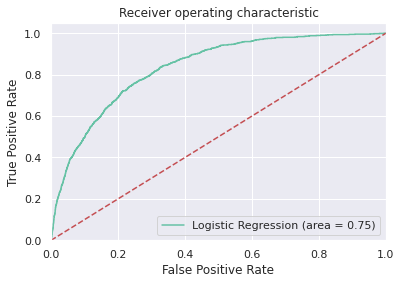

In [67]:
# Instantiate model and fit with the training data
log_reg=LogisticRegression(random_state=29, solver='liblinear').fit(X_train, y_train)
# predict the fitted data
y_pred_logistic = log_reg.predict(X_test)

# calculate and print the roc_auc_score, accuracy score and classification_report
print('roc_auc_score:', roc_auc_score(y_test, y_pred_logistic))                
print('accuracy_score:', accuracy_score(y_test, y_pred_logistic))              
print('confusion_matrix \n:', confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Calculate the Logloss for the logistic regression
proba = log_reg.predict_proba(X_test)
log_reg_logloss = log_loss(y_test, proba)
print('Log Loss for the logistic regression :', log_reg_logloss)                           

# draw the ROC_AUC curve
log_reg_roc = roc_auc_score(y_test, y_pred_logistic)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_lr, tpr_lr,label='Logistic Regression (area = %0.2f)' % log_reg_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_curve')
plt.show()

In [68]:
log_reg_score = round(log_reg.score(X_train, y_train), 2)
log_reg_score_test = round(log_reg.score(X_test, y_test), 2)
print('Logistic Regression Train Score: ', log_reg_score)
print('Logistic Regression Test Score: ', log_reg_score_test)

Logistic Regression Train Score:  0.76
Logistic Regression Test Score:  0.73


## XGBoost

After performing a <code>GridSearch</code> of parameters = {"eta": [0.01, 0.05, 0.10, 0.15] , "max_depth": [ 3, 4, 5, 6], "min_child_weight" : [ 1, 3, 5 ], "gamma": [ 0.0, 0.1, 0.2 , 0.3], "colsample_bytree": [ 0.4, 0.5, 0.6, 0.7 ], 'verbosity': [0]}, I found the following combinations of parameters are the best estimators: learning_rate=0.15, max_depth=6, min_child_weight= 1,gamma=0.2,colsample_bytree=0.6 and verbosity=0.

roc_auc_score: 0.7513866319638325
accuracy_score: 0.7890548590735307
confusion_matrix 
: [[17099  4480]
 [  265   650]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     21579
           1       0.13      0.71      0.22       915

    accuracy                           0.79     22494
   macro avg       0.56      0.75      0.55     22494
weighted avg       0.95      0.79      0.85     22494

Log Loss for the XGBoost classifier: 0.41798761415044317


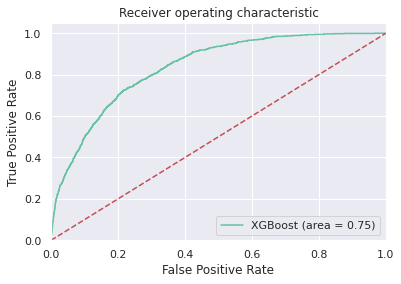

In [69]:
# Instantiate model
xgb = XGBClassifier(learning_rate=0.15,
                            max_depth=6,
                            min_child_weight= 1,
                            gamma=0.2,
                            colsample_bytree=0.6, 
                            verbosity=0,
                            use_label_encoder=False
                           )

#  Fit to the training set
xgb.fit(X_train, y_train)

# predict the fitted data
y_pred_xgb = xgb.predict(X_test)

# Compute and print metrics 
print('roc_auc_score:', roc_auc_score(y_test, y_pred_xgb))    
print('accuracy_score:', accuracy_score(y_test, y_pred_xgb))      
print('confusion_matrix \n:', confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Calculate the Log Loss for the Random Forest classifier
xgb_prob = xgb.predict_proba(X_test)
xgb_logloss = log_loss(y_test, xgb_prob)
print('Log Loss for the XGBoost classifier:', xgb_logloss)    

# draw the ROC_AUC curve
xgb_roc = roc_auc_score(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % xgb_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC_curve')
plt.show()

In [70]:
xgb_score = round(xgb.score(X_train, y_train), 2)
xgb_score_test = round(xgb.score(X_test, y_test), 2)
print('XGBoost Train Score: ', xgb_score)
print('XGBoost Test Score: ', xgb_score_test)

XGBoost Train Score:  0.83
XGBoost Test Score:  0.79


## Random Forest

After performing a <code>GridSearch</code> of parameters = {'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [12, 13, 14, 15, 16], 'max_features': ['auto', 'sqrt']}, I found the following combinations of parameters are the best estimators: n_estimator =250, max_depth=13, max_features= 'auto'.

roc_auc_score: 0.7430854526904193
accuracy_score: 0.8183071041166533
confusion_matrix 
: [[17802  3777]
 [  310   605]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     21579
           1       0.14      0.66      0.23       915

    accuracy                           0.82     22494
   macro avg       0.56      0.74      0.56     22494
weighted avg       0.95      0.82      0.87     22494

Log Loss for the RandomForest classifier: 0.39002432598528564


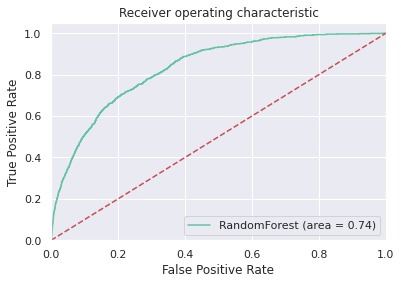

In [71]:
rf = RandomForestClassifier(n_estimators=250,
                            max_depth=13,
                            max_features='auto',
                            random_state=42)
#model fit
rf.fit(X_train, y_train)
# predict the fitted data
y_pred_rf = rf.predict(X_test)


# Compute and print metrics 
print('roc_auc_score:', roc_auc_score(y_test, y_pred_rf))   
print('accuracy_score:', accuracy_score(y_test, y_pred_rf))      
print('confusion_matrix \n:', confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



# Calculate the Log Loss for the Random Forest classifier
rf_prob = rf.predict_proba(X_test)
rf_logloss = log_loss(y_test, rf_prob)
print('Log Loss for the RandomForest classifier:', rf_logloss)    


# draw the ROC_AUC curve
rf_roc = roc_auc_score(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = %0.2f)' % rf_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC_curve')
plt.show()

In [72]:
rf_score = round(rf.score(X_train, y_train), 2)
rf_score_test = round(rf.score(X_test, y_test), 2)
print('Random Forest Train Score: ', rf_score)
print('Random Forest Test Score: ', rf_score_test)

Random Forest Train Score:  0.86
Random Forest Test Score:  0.82


## Gradiet Boosting

After performing a <code>GridSearch</code> of parameters = {'n_estimators' : [100, 150, 200, 250], learning_rate' : [0.15, 0.1, 0.05, 0.01], 'max_depth':[2,3,4,5]}, I found the following combinations of parameters are the best estimators: n_estimator =250,learning_rate= 0.15 and max_depth=5.

roc_auc_score: 0.7396890115541901
accuracy_score: 0.8127945229839069
confusion_matrix 
: [[17679  3900]
 [  311   604]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     21579
           1       0.13      0.66      0.22       915

    accuracy                           0.81     22494
   macro avg       0.56      0.74      0.56     22494
weighted avg       0.95      0.81      0.87     22494

Log Loss for the Gradient Boosting Classifier :  0.3878857211090711


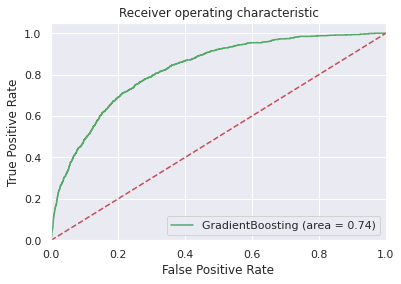

In [73]:
gradb = GradientBoostingClassifier(n_estimators=250,
                                   learning_rate=0.15,
                                   max_depth=5,
                                   random_state=42)
#  Fit to the training set
gradb.fit(X_train, y_train)
# predict the fitted data
y_pred_gradb = gradb.predict(X_test)

# Compute and print metrics
print('roc_auc_score:', roc_auc_score(y_test, y_pred_gradb)) 
print('accuracy_score:', accuracy_score(y_test, y_pred_gradb))       
print('confusion_matrix \n:', confusion_matrix(y_test, y_pred_gradb))
print(classification_report(y_test, y_pred_gradb))

# Calculate the Log Loss for the Gradient Boosting Classifier
gradb_prob = gradb.predict_proba(X_test)
gradb_logloss = log_loss(y_test, gradb_prob)
print('Log Loss for the Gradient Boosting Classifier : ', gradb_logloss)        

gradb_roc = roc_auc_score(y_test, y_pred_gradb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gradb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_gb, tpr_gb, 'g', label='GradientBoosting (area = %0.2f)' % gradb_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gradient_boosting_ROC_curve')
plt.show()

In [74]:
gradb_score = round(gradb.score(X_train, y_train), 2)
gradb_score_test = round(gradb.score(X_test, y_test), 2)
print('Gradient Boosting Train Score: ', gradb_score)
print('Gradient Boosting Test Score: ', gradb_score_test)

Gradient Boosting Train Score:  0.87
Gradient Boosting Test Score:  0.81


## k-nearest neighbors algorithm (k-NN)


I applied GreadSearch to find the best esimators from the parameters: parameters = {
    'knn__n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16],
    'knn__p':[1,2,3,4,5,6,7]
}.

I found the following combinations of parameters performs well:
parameters = {
    'knn__n_neigbors':10,
    'knn_':1
}

roc_auc_score: 0.6506061220722332
accuracy_score: 0.8476927180581488
confusion_matrix 
: [[18669  2910]
 [  516   399]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     21579
           1       0.12      0.44      0.19       915

    accuracy                           0.85     22494
   macro avg       0.55      0.65      0.55     22494
weighted avg       0.94      0.85      0.89     22494

Tuned Model Parameters: {'knn__n_neighbors': 10, 'knn__p': 1}
Log Loss for the KNN : 1.9122594360063043


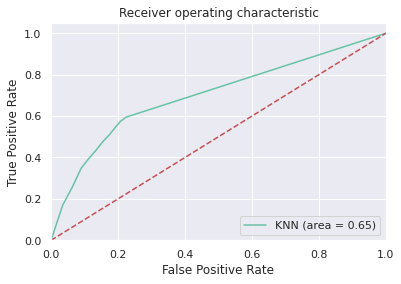

In [75]:
steps=[('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())]

pipeline=Pipeline(steps)

# Specify the hyperparameter to be tunned

parameters={'knn__n_neighbors' : [10],
           'knn__p' : [1]}

# Create the GridSearchCV object
cv_knn = GridSearchCV(pipeline, param_grid=parameters, cv=5)

#  Fit to the training set
cv_knn.fit(X_train, y_train)

# predict the fitted data
y_pred_knn = cv_knn.predict(X_test)


# Compute and print metrics 
print('roc_auc_score:', roc_auc_score(y_test, y_pred_knn))    
print('accuracy_score:', accuracy_score(y_test, y_pred_knn))       
print('confusion_matrix \n:', confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Tuned Model Parameters: {}".format(cv_knn.best_params_))

# Calculate the Log Loss for the KNN
knn_prob = cv_knn.predict_proba(X_test)
knn_logloss = log_loss(y_test, knn_prob)
print('Log Loss for the KNN :', knn_logloss)                                 


# draw the ROC_AUC curve
knn_roc=roc_auc_score(y_test, y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, cv_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % knn_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC_curve')
plt.show()

In [76]:
cv_knn_score = round(cv_knn.score(X_train, y_train), 2)
cv_knn_score_test = round(cv_knn.score(X_test, y_test), 2)
print('KNN Train Score: ', cv_knn_score)
print('KNN Test Score: ', cv_knn_score_test)

KNN Train Score:  0.94
KNN Test Score:  0.85


### Model comparison

Depending on the characteristics of the imbalanced data set, the most effective techniques will vary. Relevant evaluation parameters should be considered during the model comparison.

While comparing multiple prediction models built through an exhaustive combination of the above-mentioned techniques Lift & Area under the ROC Curve will be instrumental in determining which model is superior to the others. Even though Logistic Regression, Random Forest and GradientBoosting classification algorithms performed well to  classify the data best, XGBoost is the best candidate. It is a successful model here and it can effectively assign each observation a probability ranging from 0 to 1.


### Feature importance

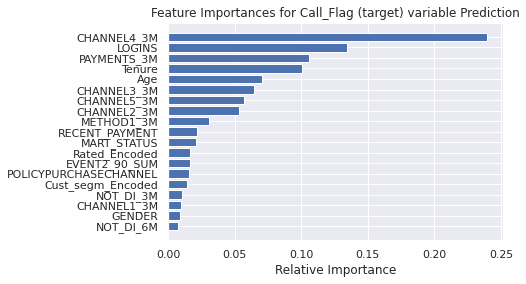

In [80]:
#Considering  Random forest for selecting features
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances for Call_Flag (target) variable Prediction')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<code>CHANNEL4_3M</code> and <code>LOGINS</code> are the strongest feature that predict service payment call; followed by variables  <code>PAYMENTS_3M</code> and <code>Tenure</code>.

### Saving Our Model
To save our trained model, we may use the pickle library so that it can be used by the server.

In [79]:
pickle.dump(xgb, open('xgb_model_GIECO_Call_Flag.pkl', 'wb'))